# CARREFOUR UNSUPERVISED LEARNING

## Defining The Question
 *  Use unsupervised learnign to gain insights that will inform the marketing strategy that will be undertaken by the marketing department
 
## Metric For Success
 *  performing extensive EDA and formulating meaningful insights
 
## The Context
 * You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.
 
## EXPERIMENTAL DESIGN TAKEN
 * Loading the libraries and datasets
 * Data Cleaning
 * EDA 
 * Visualizations and Analysis
 
## APPROPRIATENESS OF THE DATA
 * The data is divided into 4 parts and 3 different datasets 
 * The first dataset contains the most features while the third one contains the least
 

# Loading The Libraries and Datasets

In [73]:
library(data.table)#used to create datatables
library(moments)
library(corrplot)#used for visualisations
library(tidyverse)
library(tidyr)
library(ggplot2)
library(rpart)
library("rpart.plot")
library(caret)
library(devtools)
library(ggbiplot)
library(arules)#used for association analysis
library(anomalize)#used for anomaly detection
library(tibble)
library(factoextra)

In [74]:
dimension <- read.csv("Supermarket_Dataset_1 - Sales Data.csv")
dimension <- data.frame(dimension)
head(dimension)

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


* The above dataset will be used to perform dimensionality reduction and feature selection 
* They appear to be transactions by unique users in the store recording the type of product bought,the total amount spent,the gross income recieved as well as the gross relative income,the quantity,branch involved and gender

In [75]:
association <- read.transactions("Supermarket_Sales_Dataset II.csv",sep=",")b
association

Warning message in asMethod(object):
"removing duplicated items in transactions"

transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

* The association file contains 7,501 rows and 119 columns

In [76]:
anomalies <- read.csv("Supermarket_Sales_Forecasting - Sales.csv")
anomalies <- data.frame(anomalies)
head(anomalies)

Date,Sales
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165


* We will be performing anomaly detection on this dataset which consists of the sales made on specific days 

# Data Cleaning and Exploration

## Calculating null values and duplicated data

In [77]:
print(dim(dimension))

print(dim(anomalies))

print(dim(association))

[1] 1000   16
[1] 1000    2
[1] 7501  119


* The first two datasets contain 1000 rows each with the first one containing 16 columns and the second one 2 columns while the third dataset contains 119 columns and 7501 rows

In [78]:
print(colSums(is.na(dimension)))
print("###########################################################################")
print(colSums(is.na(anomalies)))
print("###########################################################################")
# print(colSums(is.na(association)))

             Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0 
[1] "###########################################################################"
 Date Sales 
    0     0 
[1] "###########################################################################"


* The datasets do not contain any null values,the datasets appear to be very clean and usable

In [79]:
print(dim(dimension[duplicated(dimension)]))
                    
print(dim(anomalies[duplicated(anomalies)]))
                                   

[1] 1000    0
[1] 1000    0


* The datasets do not contain any duplicated rows either,we will not be conducting any imputation or dropping any rows from any dataset

In [129]:
print(sapply(dimension,class))
print("###########################################################################################")
print(sapply(anomalies,class))

             Invoice.ID                  Branch           Customer.type 
               "factor"                "factor"                "factor" 
                 Gender            Product.line              Unit.price 
               "factor"                "factor"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"                  "Date" 
                   Time                 Payment                    cogs 
               "factor"                "factor"               "numeric" 
gross.margin.percentage            gross.income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric" 
[1] "###########################################################################################"
     Date     Sales 
   "Date" "numeric" 


* The major datatypes across all columns are numeric and character type

## Checking for outliers

In [81]:
sapply(dimension,class)

Invoice.ID                  Branch           Customer.type 
               "factor"                "factor"                "factor" 
                 Gender            Product.line              Unit.price 
               "factor"                "factor"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"                "factor" 
                   Time                 Payment                    cogs 
               "factor"                "factor"               "numeric" 
gross.margin.percentage            gross.income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric"

* checking the datatypes for the dimensions dataframe to single out the numerical and integer columns to subset them and create boxplots to detect outliers

In [82]:
dim_numerical <- dimension[,c(6,7,8,12,13,14,15,16)]

* creating a new dataframe with only numerical columns

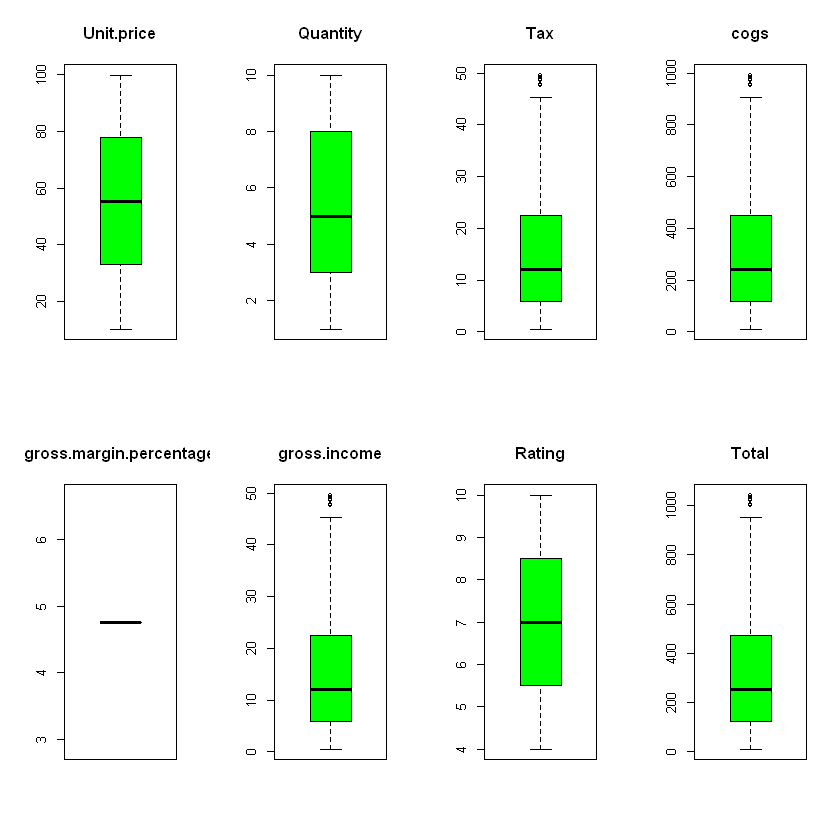

In [83]:
par(mfrow=c(2,4))
for(i in 1:8){
    boxplot (dim_numerical[,i],main = names(dim_numerical)[i],col= "green")}

* we have been able to detect some outliers in the gross income,cogs,Total and Tax columns 
* we will not exclude these outliers as we are an exploratory unsupervised learning techique that is meant to yield insights
* The outliers also do not appear to affect or skew the data to an extreme proportion 

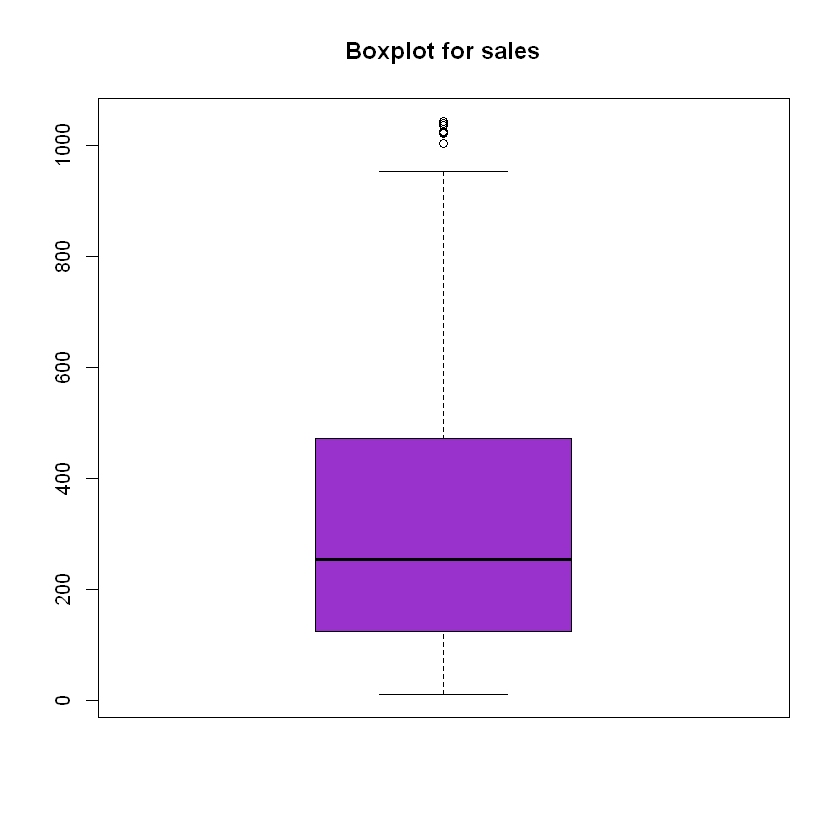

In [84]:
boxplot(anomalies$Sales,
       main = "Boxplot for sales",
       col = c("darkorchid"))

* The sales column in the anomalies dataframe does have columns of the upper percentile,we will not remove these outliers as they do not affect the quality of the data


# Exploratory Data Analysis

## Univariate Analysis

In [85]:
head(dimension)

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


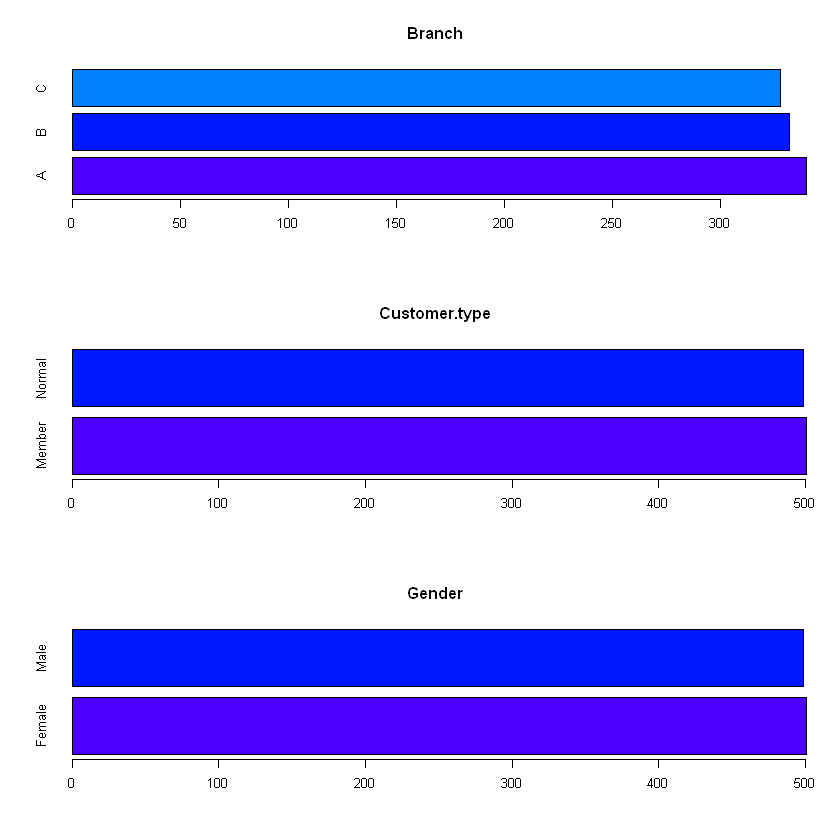

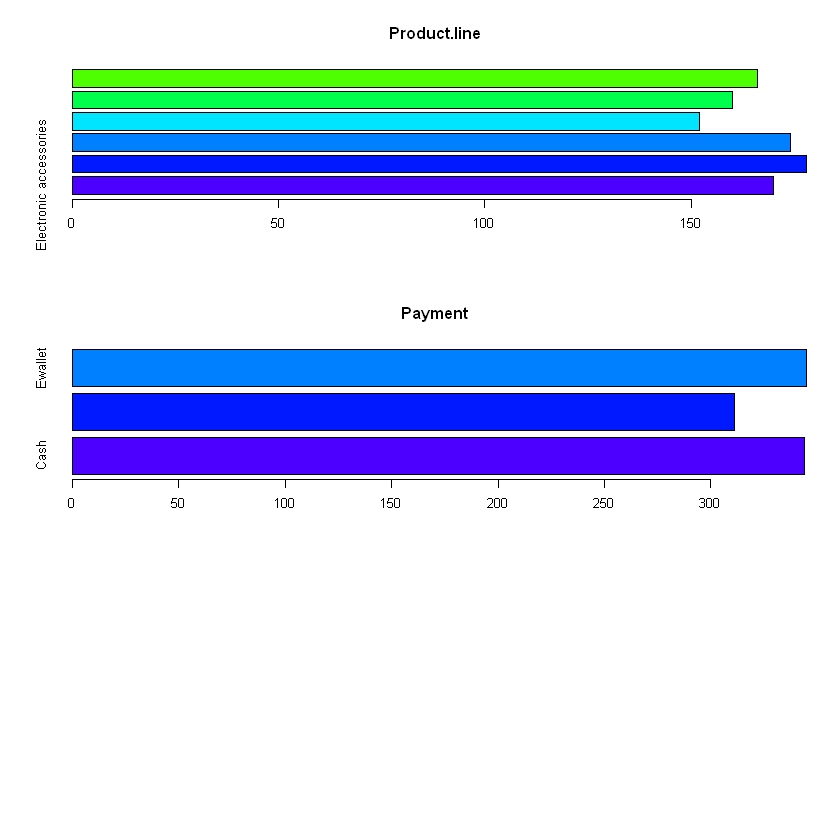

In [86]:
dim_character <- dimension[,c(2,3,4,5,11)]


par(mfrow=c(3,1))
for(i in 1:5){
    character_counts <- table(dim_character[,i])
    barplot(character_counts,main=names(dim_character)[i],col=topo.colors(10),horiz=TRUE)
}

* It appears that the counts between male and female customers is near equal with the same holding true for normal vs member customers
* It also appears the most popular branch is branch A followed by branch B then C
* let's take a closer look at the payment and product.line columns separately 

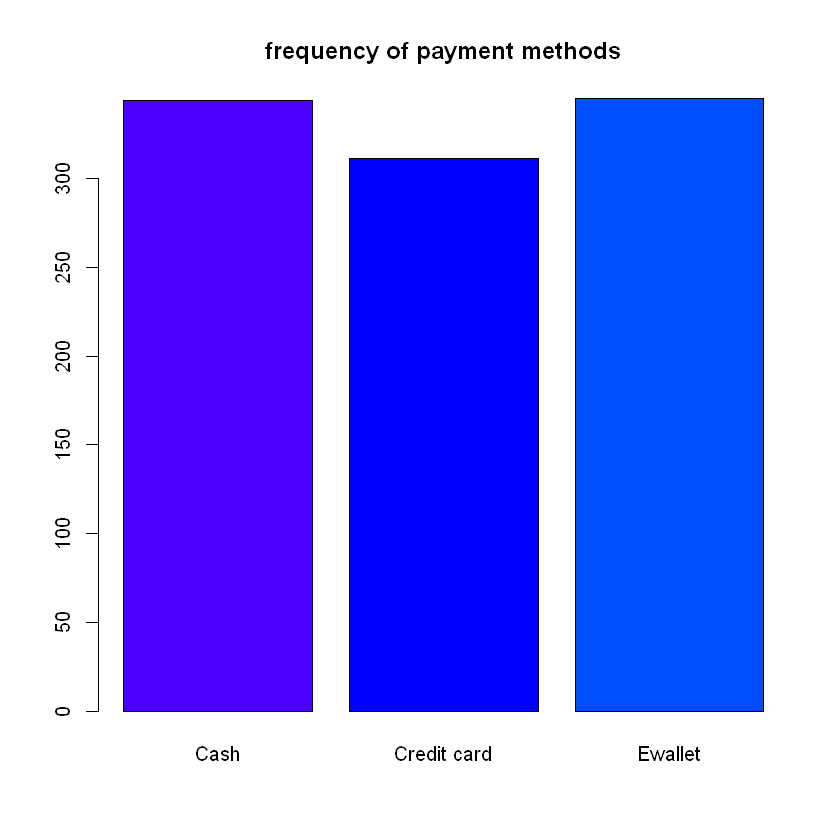

In [87]:
paymentcounts <- table(dimension$Payment)
barplot(paymentcounts,main="frequency of payment methods",col=topo.colors(15))

* It appears that the e-wallet is the most popular form of payment followed by cash then credit card

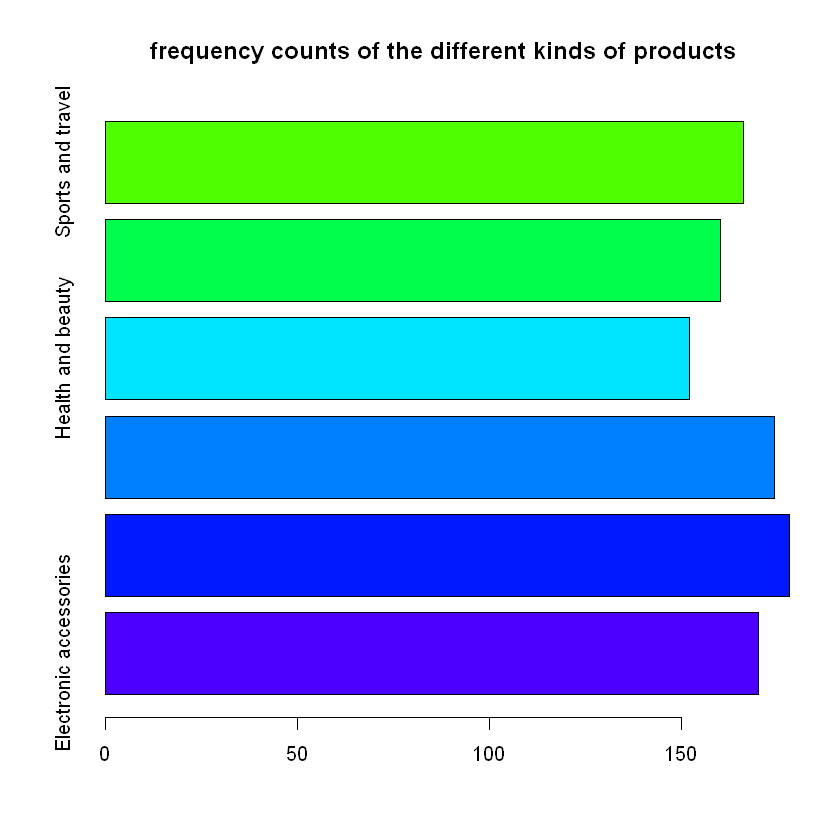

In [88]:
productlinecounts <- table(dimension$Product.line)
par(mfrow=c(1,1))
barplot(productlinecounts,main="frequency counts of the different kinds of products",
       col= topo.colors(10),horiz=TRUE)

* The most popular product category is Electronic accessories followed by health and beauty the sport and travel as the least popular

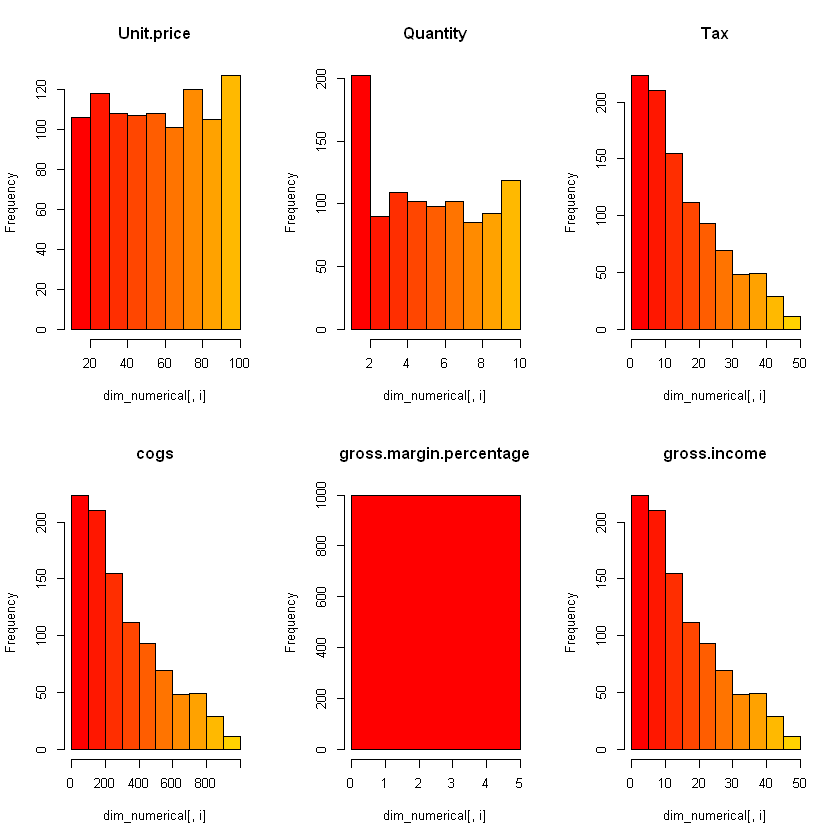

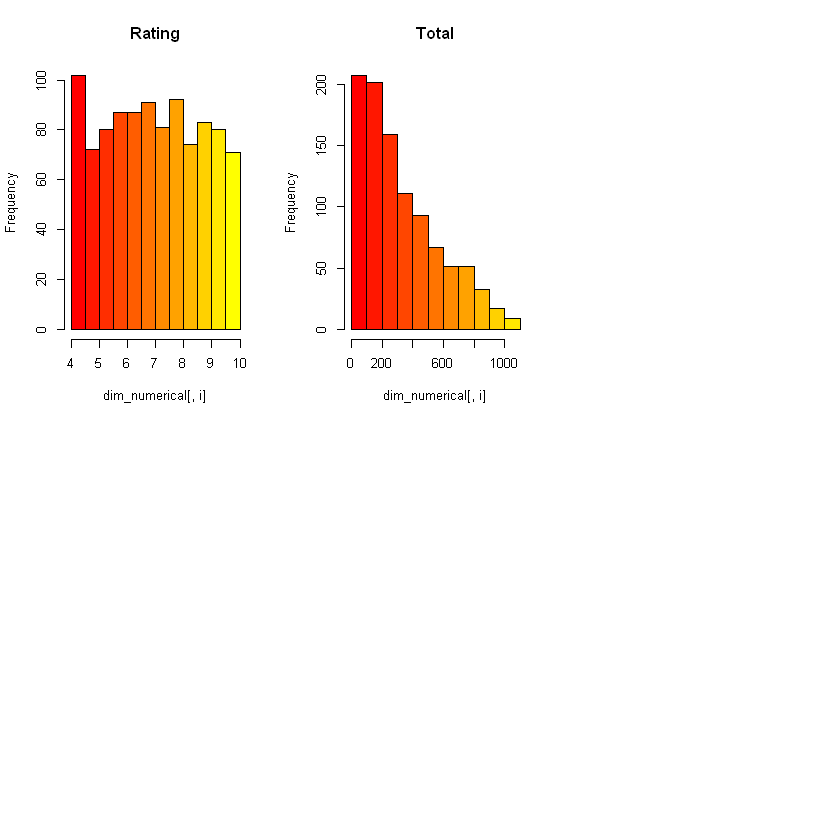

In [89]:
par(mfrow=c(2,3))
for(i in 1:8){
   hist(dim_numerical[,i],main = names(dim_numerical)[i],col= heat.colors(15))}

* The distribution of the unit price column appears to be rather evenly distributed with slight peaks appearing at 20 units,between 60 and 80 units and at 100 units

* In the quantity column it appears that most customers purchase 2 items with the second highest quantity being 10 items.This indicates that there are primarily 2 types of customers those who pop in to get very few items e.g milk and bread whilst there are those who come to do their weekly shopping which might consist of more general goods 

* The tax and cogs columns are heavily skewed to the left indicating(in the tax column's case) most products attract a tax of less than 20 units and most goods cost less than 400 units to acquire

* The gross income and Total spent columns are also heavily skewed to the left indicating most products bring in less than 20 units while most consumers spend less than 400 units in store

* the gross margin percentage column indicates that apparently all products have the same gross profit percentage ratio 

* The ratings column indicates most products have a rating of 4 indicating the skewness to the left observed and somewhat normal distribution after that.It appears that the data has a somewhat multimodal distribution  

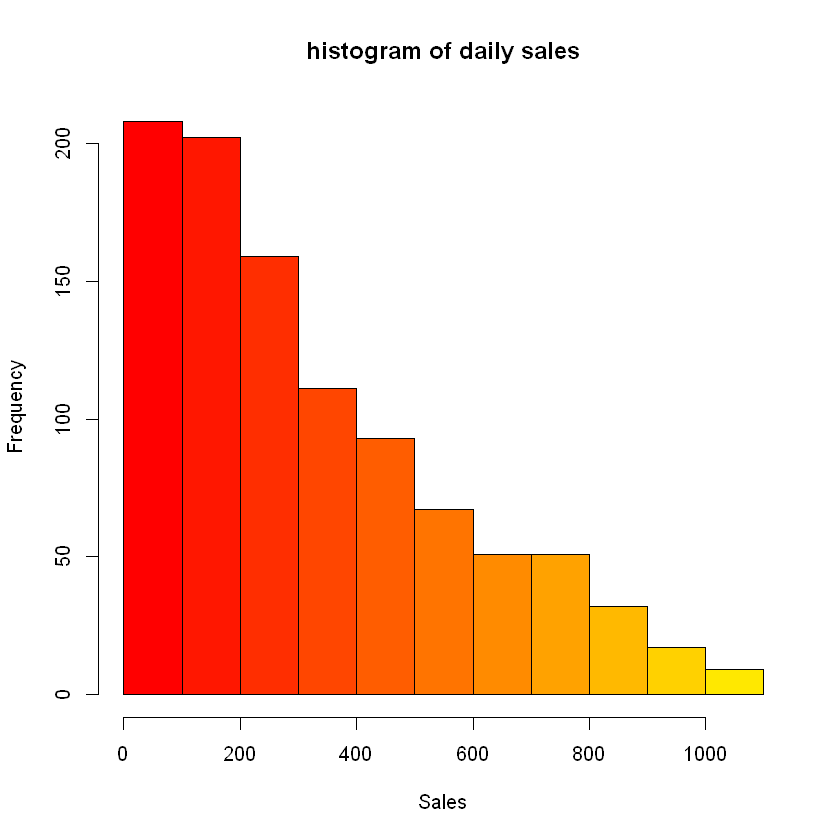

In [90]:
hist(anomalies$Sales,main="histogram of daily sales",col = heat.colors(15),xlab= "Sales")

* The sales column is heavily skewed to the left with most sales being under 200 units

## Bivariate Analysis

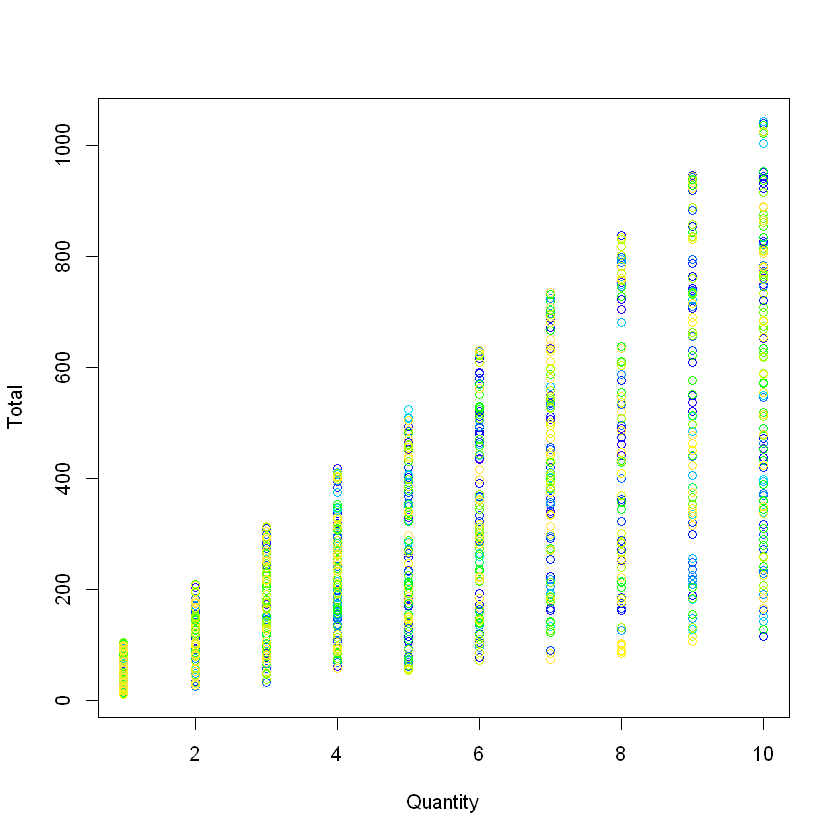

In [91]:
plot(Total~Quantity,dat=dim_numerical,col=topo.colors(1200))

* The trend observed is one of linearly 

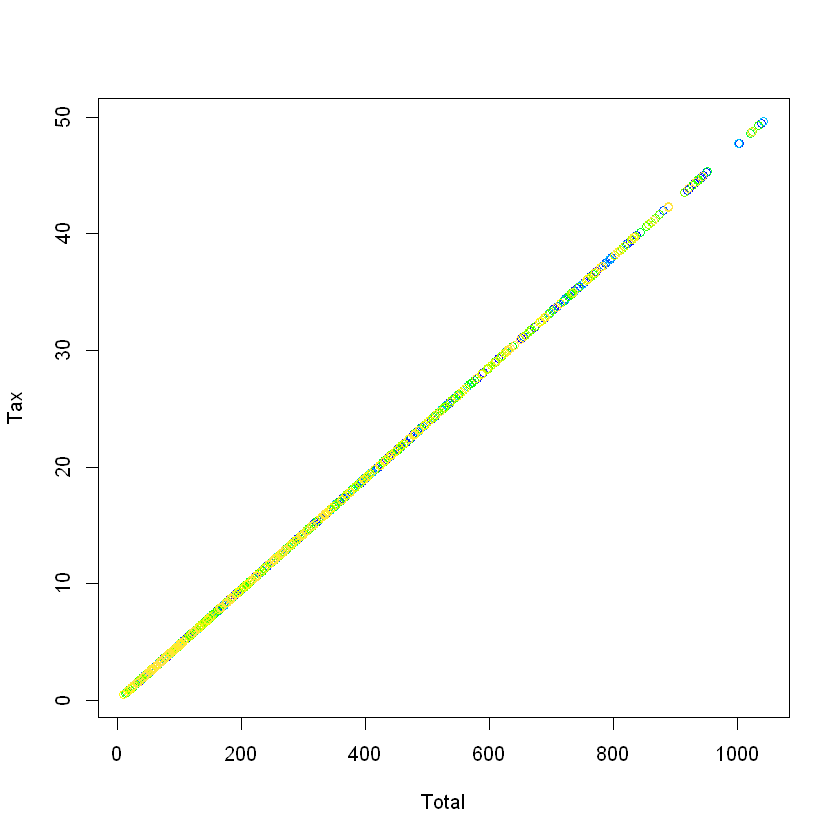

In [92]:
plot(Tax~Total,dat=dim_numerical,col=topo.colors(1200))

* The total amount spent and the tax charged appear to be heavily linearly correlated with each other

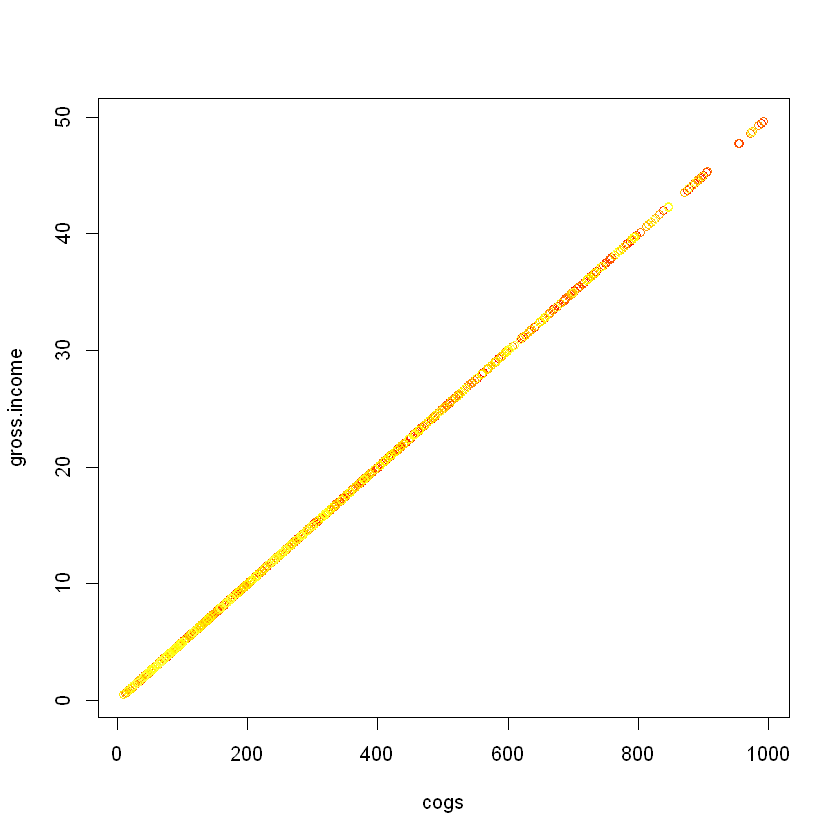

In [93]:
plot(gross.income~cogs,dat=dim_numerical,col=heat.colors(1200))

* The gross income and cost of goods sold are heavily linearly correlated with each other

Warning message in cor(dim_numerical):
"the standard deviation is zero"

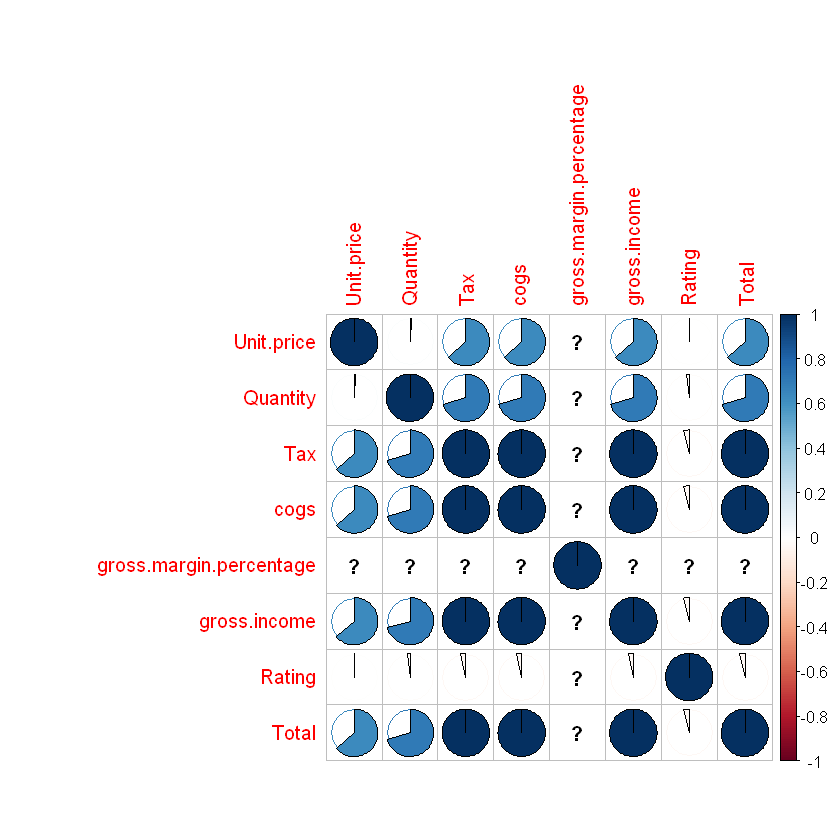

In [94]:
corr <- cor(dim_numerical)

corrplot(corr,method="pie")

* There are variables that are highly positively correlated in the dataset including the tax and cogs columns and the gross income and total columns 
* we will not be removing any highly correlated features as this is an exploratory learning problem where gleaming insights is the most important objective

In [95]:
dimension$Date <- as.Date(dimension$Date,format = "%m/%d/%Y")


In [96]:
head(dimension)

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


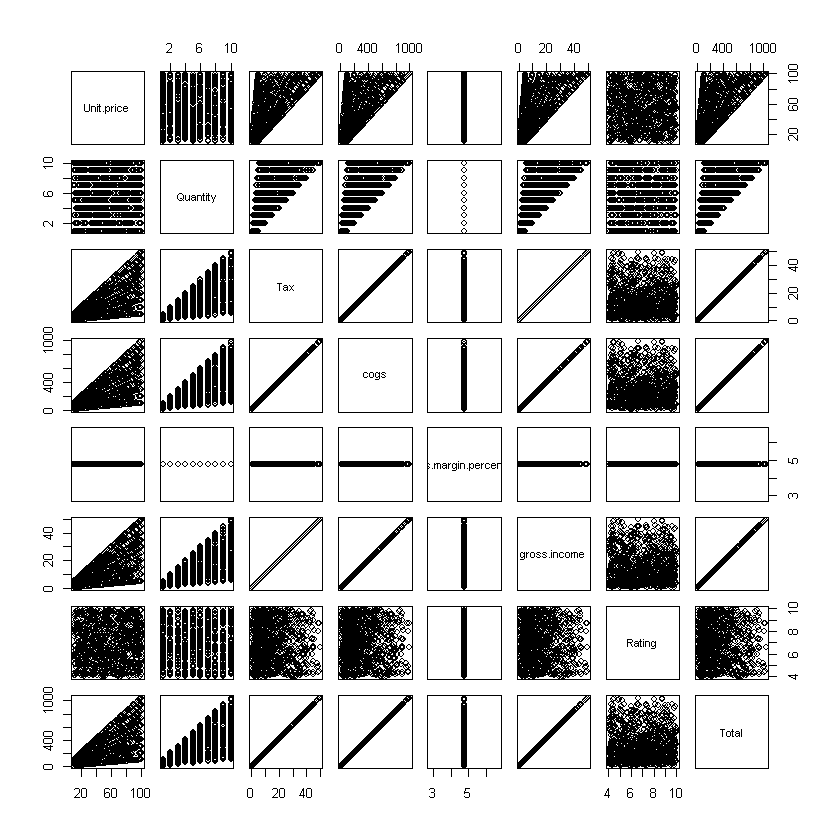

In [97]:
pairs(dim_numerical,labels=names(dim_numerical))

* from the combined pairplots above you can note that most features seem to be highly positively correlated 

# Unsupervised Learning

## Dimensionality Reduction with PCA

In [130]:
dim_num2 <- dim_numerical[c(1,2,3,4,6,7,8)]# subsetting the numerical columns but excluding the gross margin percentage income column

* To conduct dimensionality reduction we will first subset the columns that we will require,we will exclude the gross margin percentage column as it has little relevance in our analysis

In [99]:
dim_pca <- prcomp(dim_num2,center= TRUE,scale = TRUE)

* to conduct pca in r we will run the prcomp method on the subsetted dataset

In [100]:
summary(dim_pca)

Importance of components:
                          PC1    PC2    PC3     PC4       PC5       PC6
Standard deviation     2.2185 1.0002 0.9939 0.30001 3.132e-16 1.457e-16
Proportion of Variance 0.7031 0.1429 0.1411 0.01286 0.000e+00 0.000e+00
Cumulative Proportion  0.7031 0.8460 0.9871 1.00000 1.000e+00 1.000e+00
                             PC7
Standard deviation     3.219e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

* above we can see that the first prinicipal component explains over 70% of the variance while the first 3 principal components explain over 98% of the observed variance

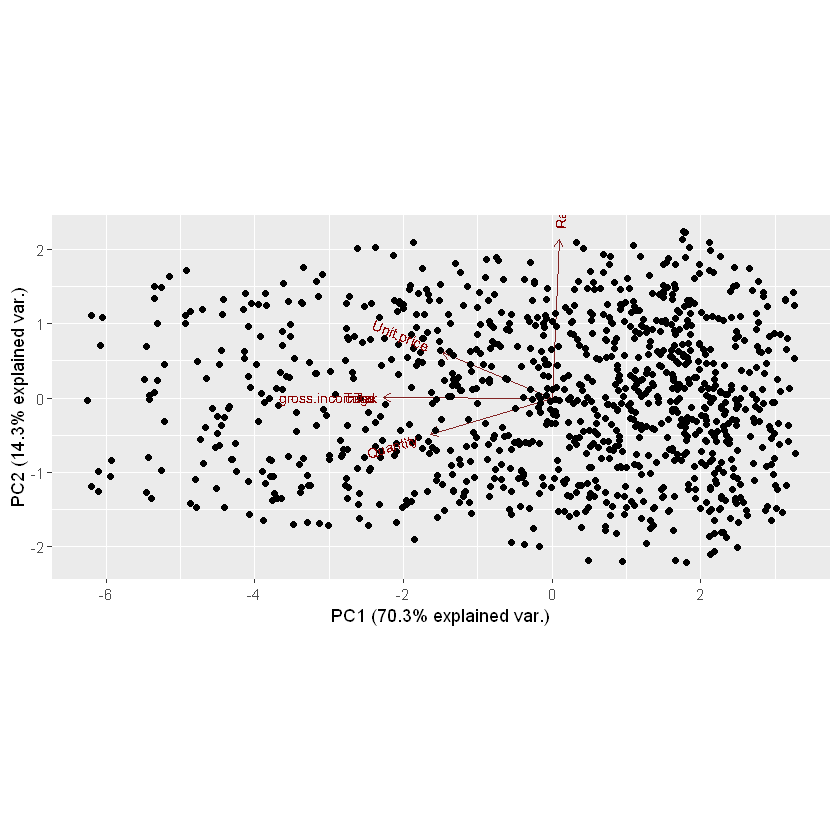

In [101]:
ggbiplot(dim_pca,labels=rownames(dim_pca),ellipse = TRUE,obs.scale=1,var.scale=1)

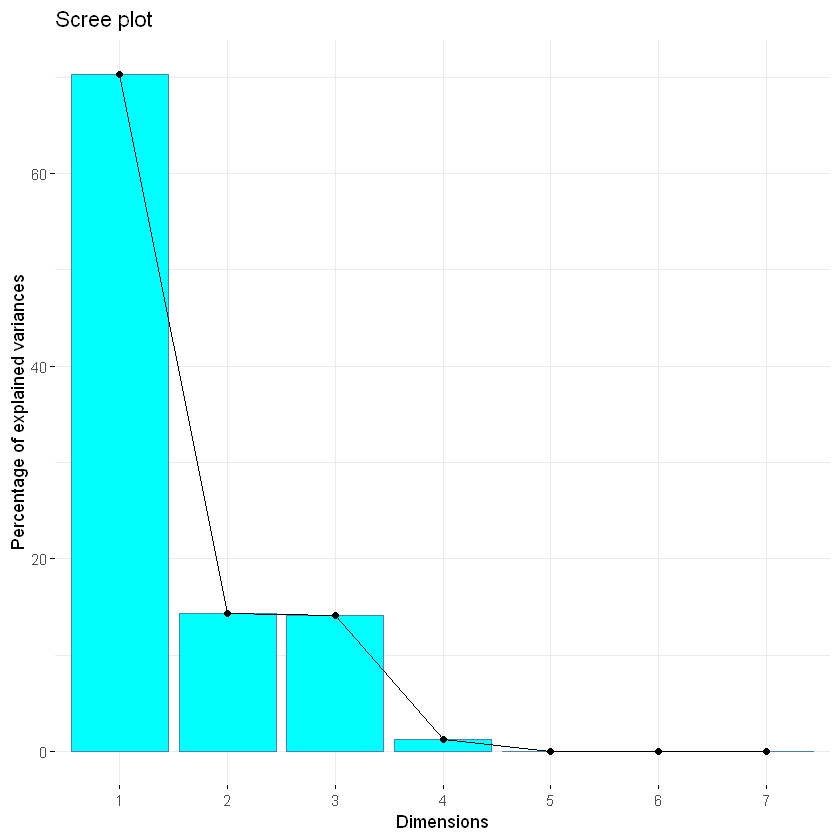

In [102]:
fviz_eig(dim_pca,barfill="cyan")

* the barplot of the principal compnents is a graphical representation of the observed phenomena above

In [103]:
str(dim_pca)

List of 5
 $ sdev    : num [1:7] 2.22 1.00 9.94e-01 3.00e-01 3.13e-16 ...
 $ rotation: num [1:7, 1:7] -0.292 -0.325 -0.45 -0.45 -0.45 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:7] 55.67 5.51 15.38 307.59 15.38 ...
  ..- attr(*, "names")= chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ scale   : Named num [1:7] 26.49 2.92 11.71 234.18 11.71 ...
  ..- attr(*, "names")= chr [1:7] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ x       : num [1:1000, 1:7] -2.005 2.306 -0.186 -1.504 -2.8 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


## Feature Selection

In [104]:
highlycorrelated <- findCorrelation(cor(dim_nubm2),cutoff=0.75)

* above we create a dataframe with the features that have a high degree of correlation

In [105]:
names(dim_num2[,highlycorrelated])

[1] "cogs"  "Total" "Tax"

* it appears that the cogs,total and tax columns have the highest correlated features
* we will continue by dropping these columns

In [131]:
dim_numerical2 <- dim_num2[,-highlycorrelated]# dropping the correlated columns

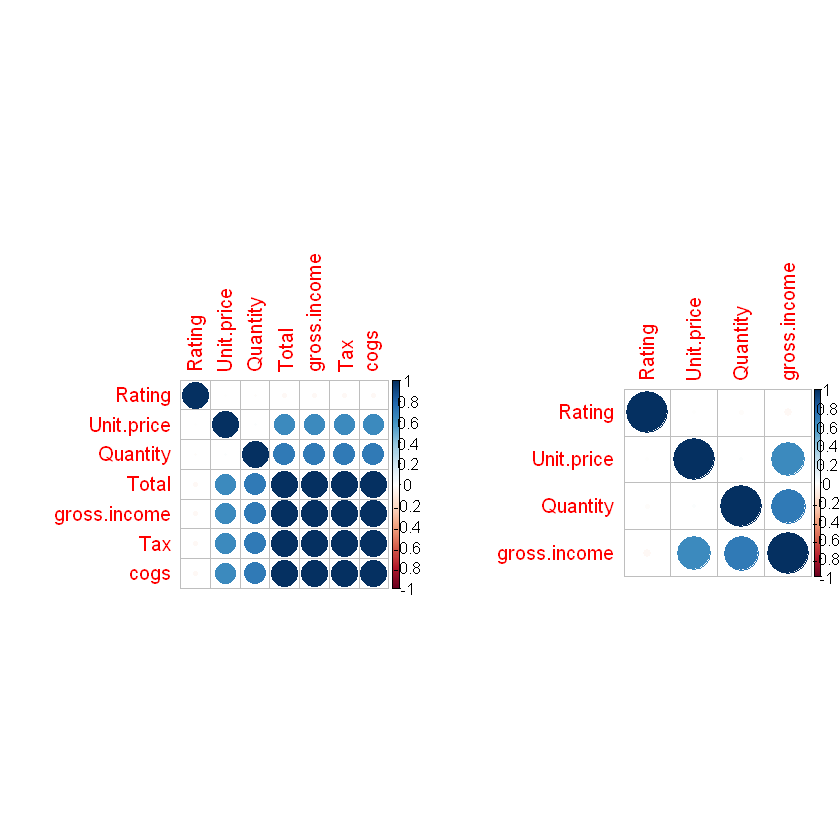

In [107]:
par(mfrow = c(1,2))
corrplot(cor(dim_num2), order = "hclust")
corrplot(cor(dim_numerical2), order = "hclust")

* the correlation matrix above indicates that we were succesful at identifying and removing the highly correlated features from the dataset

## Association Rules

* this is analysis done to see which values e.g goods are most likely to go along with each other based on previously recorded correlations of their order

In [108]:
class(association)

[1] "transactions"
attr(,"package")
[1] "arules"

* checking the datatypes of the dataframe

In [109]:
inspect(association[1:5])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


* previewing the first 5 rows

In [110]:
items <- as.data.frame(itemLabels(association))
colnames(items) <- "item"
head(items,10)

item
almonds
antioxydant juice
asparagus
avocado
babies food
bacon
barbecue sauce
black tea
blueberries
body spray


* previewing the items that make up our dataset

In [111]:
summary(association)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

* above we did a summary of the transacntions to get the most frequent transanctions

* we can observe the the most frequently occuring items are mineral water,eggs and spaghetti

In [133]:
itemFrequency(association[,8:10],type= "absolute")

black tea blueberries  body spray 
        107          69          86

* checking the frequency of the items ranging from transaction 8-10 in absolute terms

In [113]:
round(itemFrequency(association[,8:10],type="relative") *100,2)

black tea blueberries  body spray 
       1.43        0.92        1.15

* checking the most frequent items from transaction 8-10 in relative terms

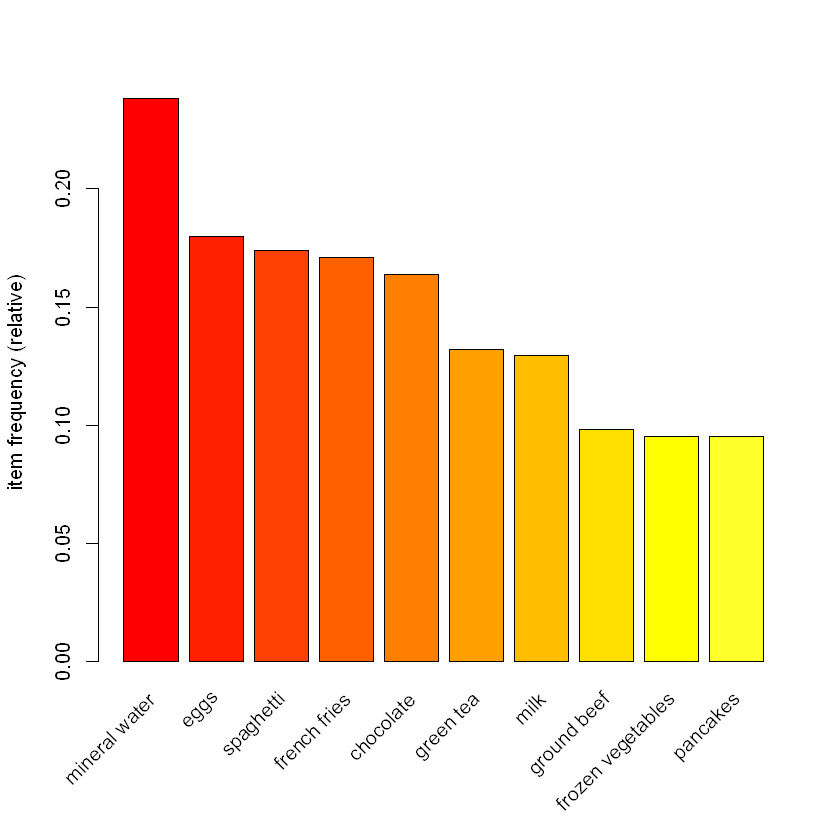

In [114]:
par(mfrow=c(1, 1))

itemFrequencyPlot(association,topN = 10,col=heat.colors(12))

* above is a frequency barplot of the most frequently occuring and most important transanctions in the dataset

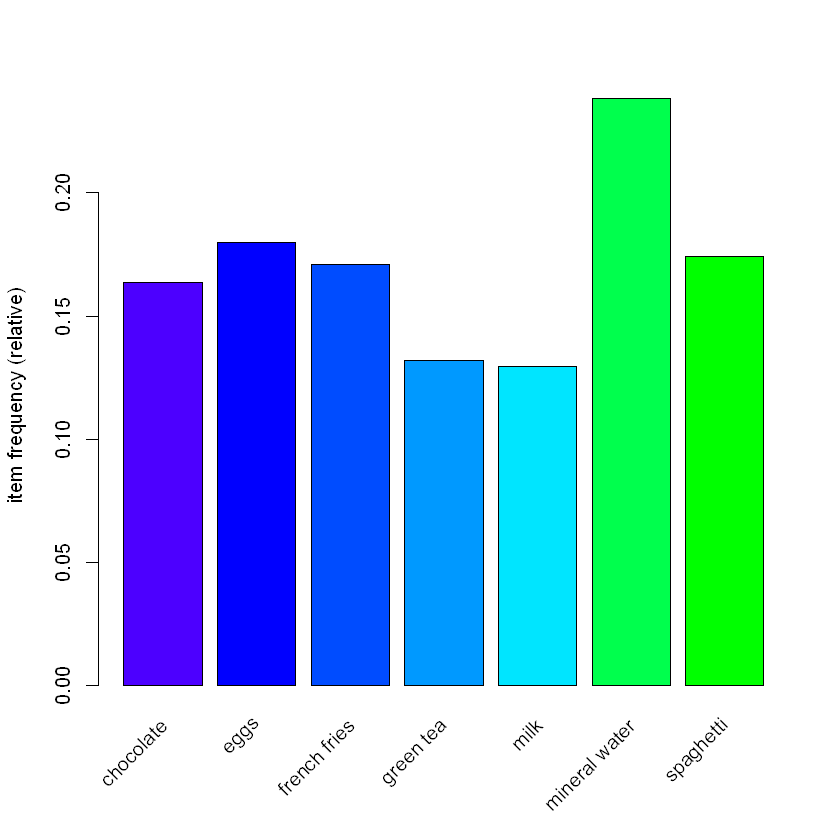

In [128]:
itemFrequencyPlot(association,support=0.1,col=topo.colors(15))

In [134]:
rules <- apriori(association,parameter=list(supp=0.001,conf=0.8))# using the apriori method to build a model based on association rules
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

* from the model we have discovered 74 rules using a confidence levelof 0.8 and a support of 0.001

In [135]:
summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence          lift            count       
 Min.   :0.001067   Min.   :0.8000   Min.   : 3.356   Min.   : 8.000  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.: 3.432   1st Qu.: 8.000  
 Median :0.001133   Median :0.8333   Median : 3.795   Median : 8.500  
 Mean   :0.001256   Mean   :0.8504   Mean   : 4.823   Mean   : 9.419  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.: 4.877   3rd Qu.:10.000  
 Max.   :0.002533   Max.   :1.0000   Max.   :12.722   Max.   :19.000  

mining info:
        data ntransactions support confidence
 association          7501   0.001        0.8

* obtaining a summary of the results 

In [136]:
inspect(rules[1:5])

    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    lift      count
[1]  3.729058  8   
[2]  4.666587 13   
[3]  3.432428  9   
[4]  3.595877 12   
[5] 11.976387 19   


* upon inspecting the rules we can observe that the first one simply says that a person is 88% likely to buy mineral water if they have bought a frozen smoothie and spinach

In [137]:
rules <- sort(rules,by="confidence",decreasing = TRUE)
inspect(rules[1:5])

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence lift      count
[1] 1.00       12.606723  8   
[2] 1.00        4.195190  9   
[3] 1.00        7.717078  8   
[4] 1.00        4.195190  9   
[5] 0.95       11.976387 19   


* the given rules above have a confidence of 100 which is about as good as it gets
* what this means is that the above rules have a 100% chance of occuring as stated e.g there is a 100% chance that a person is likely to buy mineral water if they bought cake,olive oil and shrimp

### Testing

In [138]:
spaghetti <- subset(rules,subset=rhs %pin% "spaghetti")

spaghetti <-sort(spaghetti,by="confidence",decreasing=TRUE)
inspect(spaghetti[1:5])

    lhs                    rhs             support confidence     lift count
[1] {light cream,                                                           
     mineral water,                                                         
     shrimp}            => {spaghetti} 0.001066524  0.8888889 5.105326     8
[2] {ground beef,                                                           
     salmon,                                                                
     shrimp}            => {spaghetti} 0.001066524  0.8888889 5.105326     8
[3] {burgers,                                                               
     milk,                                                                  
     salmon}            => {spaghetti} 0.001066524  0.8888889 5.105326     8
[4] {frozen vegetables,                                                     
     ground beef,                                                           
     mineral water,                                                         

* testing out the model by giving it a value in this case spaghetti and seeing what they were most likely to buy before buying spaghetti

In [148]:
shrimp <- subset(rules,subset=lhs %pin% "shrimp")

shrimp <-sort(shrimp,by="confidence",decreasing=TRUE)
inspect(shrimp[1:5])

    lhs                    rhs                 support confidence     lift count
[1] {cake,                                                                      
     olive oil,                                                                 
     shrimp}            => {mineral water} 0.001199840  1.0000000 4.195190     9
[2] {chocolate,                                                                 
     frozen vegetables,                                                         
     olive oil,                                                                 
     shrimp}            => {mineral water} 0.001199840  0.9000000 3.775671     9
[3] {light cream,                                                               
     mineral water,                                                             
     shrimp}            => {spaghetti}     0.001066524  0.8888889 5.105326     8
[4] {ground beef,                                                               
     salmon,                

* the above one is testing what a customer might buy if they bought in this case shrimp

## Anomaly Detection

In [122]:
anomalies$Date <- as.Date(anomalies$Date)

In [123]:
anomalies <- as_tibble(anomalies)

In [124]:
class(anomalies)

[1] "tbl_df"     "tbl"        "data.frame"

In [125]:
anomalies <- anomalies %>%
                    tibbletime::as_tbl_time(index = Date)


In [126]:
head(anomalies)

Date,Sales
0001-05-20,548.9715
0003-08-20,80.2200
0003-03-20,340.5255
NA,489.0480
0002-08-20,634.3785
NA,627.6165


In [127]:
anomalies %>%
    time_decompose(Date) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)



ERROR: Error in try.xts(x, error = "'x' needs to be timeBased or xtsible"): 'x' needs to be timeBased or xtsible


In [ ]:
class(anomalies)

In [ ]:
anomalize(anomalies)